# 0) Data Load/Fix 

In [1]:
import matplotlib.pylab as plt
import datetime
import pandas as pd 
import numpy as np 

In [2]:
cd

/Users/yennanliu


In [3]:
ls 

17media_analytics/          deep_electro/
Applications/               deep_electro_test.ipynb
Desktop/                    docker_file/
Documents/                  eclipse/
Downloads/                  gogovan-analytics/
Dropbox/                    iCloud Drive (Archive)/
Go/                         models/
KKBox_Music_Recommendation/ movie_recommendation/
Kaggle.com_mini_project/    node_modules/
Library/                    notebook/
Movies/                     notebook.textClipping
Music/                      sequence_predictor/
NYC_Taxi_Trip_Duration/     song_recommender/
Pictures/                   spark/
Public/                     spark-2.3.0-bin-hadoop2.7/
SGTaxiMap/                  uk_data_team/
anaconda3/                  utility_JS/
analysis/                   utility_Java/
api/                        utility_python/
bin/                        utility_shell/
brussels-ops-tool/          web_development/
brussels-reporting/         web_scraping/
brussels-web-scraping/      xgb

In [4]:
cd sequence_predictor/data

/Users/yennanliu/sequence_predictor/data


In [5]:
df_fb = pd.read_csv('FB.csv')
df_APPLE = pd.read_csv('APPLE.csv')

In [6]:
df_fb.head(3)

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2018-04-12,166.98,167.45,163.10,163.87,38262956
1,1,2018-04-11,165.36,168.65,163.25,166.32,56144633
2,2,2018-04-10,157.93,165.98,157.01,165.04,58947041


In [7]:
df_APPLE.columns

Index(['Unnamed: 0', 'Date', ' Open', ' High', ' Low', ' Close', ' Volume'], dtype='object')

In [8]:
def col_fix(df):
    df = df.drop('Unnamed: 0', axis=1) 
    print (df.columns)
    df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    print (df.head())
    return df 

In [9]:
df_APPLE_ = col_fix(df_APPLE)

Index(['Date', ' Open', ' High', ' Low', ' Close', ' Volume'], dtype='object')
         Date    Open      High      Low   Close    Volume
0  2018-04-12  173.41  175.0000  173.040  174.14  22889285
1  2018-04-11  172.23  173.9232  171.700  172.44  22431640
2  2018-04-10  173.00  174.0000  171.530  173.25  28614241
3  2018-04-09  169.88  173.0900  169.845  170.05  29017718
4  2018-04-06  170.97  172.4800  168.200  168.38  35005290


In [10]:
df_APPLE_.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

# 1) RNN 

In [11]:

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.recurrent import LSTM, GRU
from keras.layers import Convolution1D, MaxPooling1D
from keras.callbacks import Callback




def regression_model(df,col_name):
	# fitting with scaled data 
	model = Sequential()
	model.add(Dense(500, input_shape = (1, )))
	model.add(Activation('relu'))
	model.add(Dropout(0.25))
	model.add(Dense(250))
	model.add(Activation('relu'))
	model.add(Dense(1))
	model.add(Activation('softmax'))
	model.compile(optimizer='adam', loss='mse')
# --------------
	### only get col_name as input / target data values 
	df_ = df.copy()
	x__ = df_[col_name]
	Y_train = df_[col_name]
	params = []
	for xt in x__: # taking training data from unscaled array
		xt = np.array(xt)
		#print (xt)
		mean_ = xt.mean()
		scale_ = x__.std()
		params.append([mean_, scale_])

	predicted = model.predict(x__)
	new_predicted = []

	# restoring data
	for pred, par in zip(predicted, params):
		a = pred*par[1]
		a += par[0]
		new_predicted.append(a)

# --------------
	new_predicted_ = np.array(new_predicted).flatten()
	new_predicted_ = pd.DataFrame(new_predicted_, dtype='str')
	output=pd.DataFrame()
	output['actual'] =Y_train
	output['predict'] =new_predicted_
	output['predict']=output['predict'].astype(float)
	print (output)
	return output 





def RNN_model_2(df,col_name):
	# fitting with scaled data 
	model = Sequential()
	model.add(Dense(500, input_shape = (1, )))
	model.add(Activation('relu'))
	model.add(Dropout(0.25))
	model.add(Dense(250))
	model.add(Activation('relu'))
	model.add(Dense(1))
	model.add(Activation('relu'))
	model.add(Dense(250, input_shape = (1, )))
	model.add(Activation('softmax'))
	#model.add(Dropout(0.25))
	model.compile(optimizer='adam', loss='mse')
# --------------
	### only get col_name as input / target data values 
	df_ = df.copy()
	x__ = df_[col_name]
	Y_train = df_[col_name]
	params = []
	for xt in x__: # taking training data from unscaled array
		xt = np.array(xt)
		#print (xt)
		mean_ = xt.mean()
		scale_ = x__.std()
		params.append([mean_, scale_])

	predicted = model.predict(x__)
	new_predicted = []

	# restoring data
	for pred, par in zip(predicted, params):
		a = pred*par[1]
		a += par[0]
		new_predicted.append(a)

# --------------
	new_predicted_ = np.array(new_predicted).flatten()
	new_predicted_ = pd.DataFrame(new_predicted_, dtype='str')
	output=pd.DataFrame()
	output['actual'] =Y_train
	output['predict'] =new_predicted_
	output['predict']=output['predict'].astype(float)
	# print model architecture
	print (model.summary())
	# print prediction  
	print (output)
	return output 


Using TensorFlow backend.
/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [12]:
regression_model

<function __main__.regression_model>

In [13]:
output = regression_model(df_APPLE_,'Open')

        actual     predict
0     173.4100  222.576320
1     172.2300  221.396320
2     173.0000  222.166320
3     169.8800  219.046330
4     170.9700  220.136320
5     172.5800  221.746320
6     164.8800  214.046330
7     167.6400  216.806320
8     166.6400  215.806320
9     167.8050  216.971310
10    167.2500  216.416320
11    173.6800  222.846310
12    168.0700  217.236330
13    168.3900  217.556320
14    170.0000  219.166320
15    175.0400  224.206310
16    175.2400  224.406330
17    177.3200  226.486330
18    178.6500  227.816310
19    178.5000  227.666320
20    180.3200  229.486330
21    182.5900  231.756320
22    180.2900  229.456310
23    177.9600  227.126330
24    175.4800  224.646320
25    174.9400  224.106320
26    177.9100  227.076320
27    175.2100  224.376330
28    172.8000  221.966320
29    178.5400  227.706310
...        ...         ...
4036    1.7193   50.885616
4037    1.7471   50.913418
4038    1.6907   50.857018
4039    1.6764   50.842716
4040    1.6757   50.842020
4

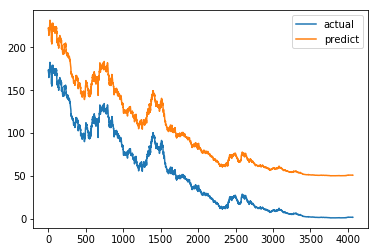

In [14]:
output.plot()

In [15]:
output

,actual,predict
0,173.4100,222.576320
1,172.2300,221.396320
2,173.0000,222.166320
3,169.8800,219.046330
4,170.9700,220.136320
5,172.5800,221.746320
6,164.8800,214.046330
7,167.6400,216.806320
8,166.6400,215.806320
9,167.8050,216.971310


In [16]:
df_APPLE_.head(3)

,Date,Open,High,Low,Close,Volume
0,2018-04-12,173.41,175.0000,173.04,174.14,22889285
1,2018-04-11,172.23,173.9232,171.70,172.44,22431640
2,2018-04-10,173.00,174.0000,171.53,173.25,28614241


In [17]:
df_APPLE_.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [18]:
df_train = df_APPLE_[['Date','Open']]

In [19]:
df_train.head(3)

,Date,Open
0,2018-04-12,173.41
1,2018-04-11,172.23
2,2018-04-10,173.00


    Close     Open
0  174.14  173.410
1  172.44  172.230
2  173.25  173.000
3  170.05  169.880
4  168.38  170.970
5  172.80  172.580
6  171.61  164.880
7  168.39  167.640
8  166.68  166.640
9  167.78  167.805


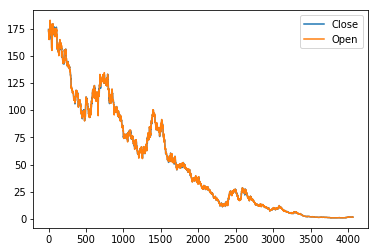

In [20]:
print (df_APPLE_[['Close','Open']].head(10))
df_APPLE_[['Close','Open']].plot()

In [21]:
df_train = df_APPLE_[['Date','Open']]
#RNN_model_1(df_FB_,'Open')
df_output = RNN_model_2(df_train,'Open')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               1000      
_________________________________________________________________
activation_4 (Activation)    (None, 500)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               125250    
_________________________________________________________________
activation_5 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 251       
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
__________

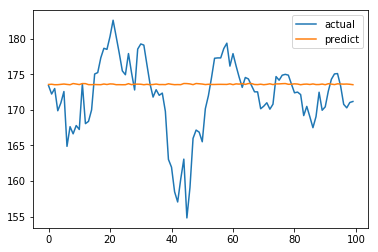

In [22]:
df_output.head(100).plot()

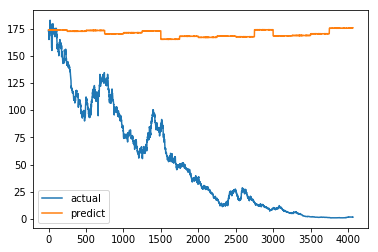

In [23]:
df_output.plot()